In [11]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

0.9842096407650001 0.023617689920728536
母平均が0.976のt値：1.0428167351534319
母平均が0.976である確率(p値)：0.32423387527604297
0.9298731279550293 1.0701268720449708


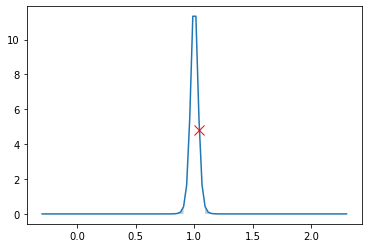

In [516]:
"""1標本t検定"""
# 分布の中心, 標準偏差
center = 1
sigma = 0.031
# 比較する標本の位置
pos = 0.976
# サンプル数
u = 10


y = np.random.normal(loc=center, scale=sigma, size=u)
print(np.average(y), np.std(y))

# t値とp値を求める
t, p = stats.ttest_1samp(y, popmean=pos)
print(f'母平均が{pos}のt値：'+str(t))
print(f'母平均が{pos}である確率(p値)：'+str(p))
    

# サンプル数、自由度
n, k = len(y), u-1

############################
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# t分布を描画する
x = np.linspace(center-1.3, center+1.3, 100)
ax.plot(x, stats.t.pdf(x, k, loc=center, scale=sigma))

#　分布のt値
ax.plot(t, stats.t.pdf(t, k, loc=center, scale=sigma), 'x', color='red', markersize=10)
# ax.plot(t, stats.t.pdf(t, k, loc=center, scale=sigma), 'x', color='red', markersize=10)

# t分布の95%信頼区間から外れた領域を描画する
bottom, up = stats.t.interval(alpha=0.95, df=k, loc=center, scale=sigma)
print(bottom, up)
plt.fill_between(x, stats.t.pdf(x, k, loc=center, scale=sigma), 
                 0, where=(x>=up)|(x<=bottom), facecolor='black', alpha=0.2)

plt.show()

[997.   0.   1.   0.   0.   0.   1.   0.   0.   1.]
[1.22816168e-22 1.63154839e-04 3.26309677e-04 4.89464516e-04
 6.52619355e-04 8.15774193e-04 9.78929032e-04 1.14208387e-03
 1.30523871e-03 1.46839355e-03 1.63154839e-03]


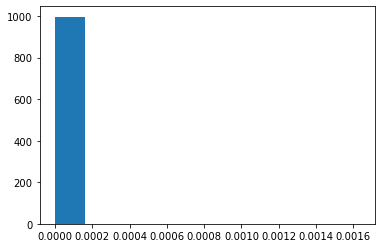

In [524]:
# 分布の中心, 標準偏差
center = 0.9999
sigma = 0.031
# 比較する標本の位置
pos = 0.989
# サンプル数
u = 350

a = []
for i in range(1000):
    y = np.random.normal(loc=center, scale=sigma, size=u)
    # t値とp値を求める
    t, p = stats.ttest_1samp(y, popmean=pos)
    a.append(p)
    
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
n1, bins1, patches1 = ax.hist(a)
print(n1)
print(bins1)

0.0077777489552039135
0.9797432849433356
0.020256715056664387
(1.237344245791203, 14.44937533544792)


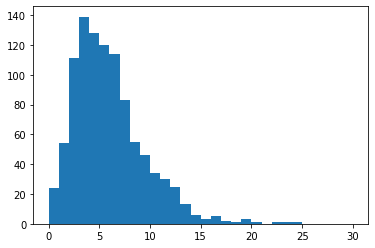

In [41]:
"""カイ二乗分布"""
from scipy.stats import chi2

x = chi2.rvs(df=6, loc=0, scale=1, size=1000)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
n1, bins1, patches1 = ax.hist(x, bins=30, range=(0, 30))

# 確率密度関数
print(chi2.pdf(df=6, x=15.0, loc=0, scale=1))

# 累積分布関数
print(chi2.cdf(df=6, x=15.0, loc=0, scale=1))

# 生存関数(1-累積分布関数)
print(chi2.sf(df=6, x=15.0, loc=0, scale=1))

# インターバル関数
print(chi2.interval(df=6, alpha=0.95, loc=0, scale=1))